Wczytanie wyczyszconych danych

In [1]:
import ast
import pandas as pd

In [2]:
tweets = pd.read_csv('../cleaned_datasets/covid_tweets.csv', sep='\t', encoding='utf-8')
tweets['tweet_clean_tokens'] = tweets['tweet_clean_tokens'].apply(ast.literal_eval)
tweets = tweets.dropna(how="any", axis=0)
tweets

,label,tweet,tweet_clean_tokens,tweet_clean,length
0,2,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,"[menyrbi, philgahan, chrisitv]",menyrbi philgahan chrisitv,26
1,3,advice Talk to your neighbours family to excha...,"[advic, talk, neighbour, famili, exchang, phon...",advic talk neighbour famili exchang phone numb...,174
2,3,Coronavirus Australia: Woolworths to give elde...,"[coronavirus, australia, woolworth, give, elde...",coronavirus australia woolworth give elder dis...,79
3,3,My food stock is not the only one which is emp...,"[food, stock, empti, pleas, dont, panic, enoug...",food stock empti pleas dont panic enough food ...,128
4,0,"Me, ready to go at supermarket during the #COV...","[readi, go, supermarket, outbreak, paranoid, f...",readi go supermarket outbreak paranoid food st...,164
...,...,...,...,...,...
44950,3,Meanwhile In A Supermarket in Israel -- People...,"[meanwhil, supermarket, israel, peopl, danc, s...",meanwhil supermarket israel peopl danc sing to...,73
44951,1,Did you panic buy a lot of non-perishable item...,"[panic, buy, lot, nonperish, item, echo, need,...",panic buy lot nonperish item echo need food do...,94
44952,2,Asst Prof of Economics @cconces was on @NBCPhi...,"[asst, prof, econom, cconc, nbcphiladelphia, t...",asst prof econom cconc nbcphiladelphia talk re...,98
44953,0,Gov need to do somethings instead of biar je r...,"[gov, need, someth, instead, biar, rakyat, ass...",gov need someth instead biar rakyat assum lock...,117


Wizualizacja tokenów

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

bardzo negatywne

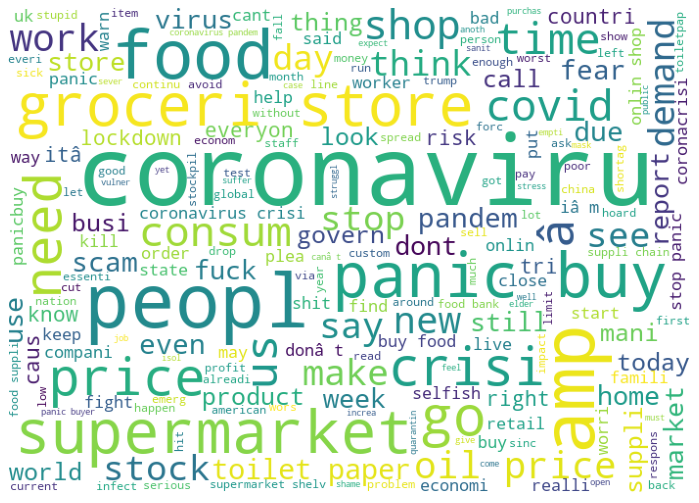

In [4]:
extremely_negative_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
extremely_negative_word_cloud.generate(' '.join(text for text in tweets.loc[tweets['label'] == 0, 'tweet_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(extremely_negative_word_cloud)
plt.show()

negatywne

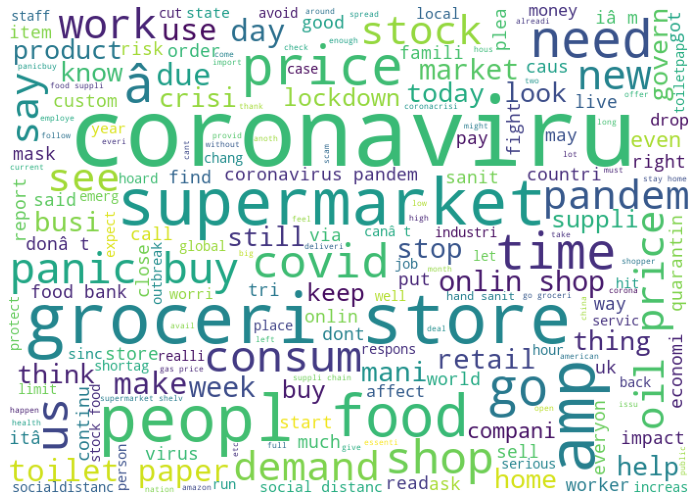

In [5]:
negative_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
negative_word_cloud.generate(' '.join(text for text in tweets.loc[tweets['label'] == 1, 'tweet_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(negative_word_cloud)
plt.show()

neutralne

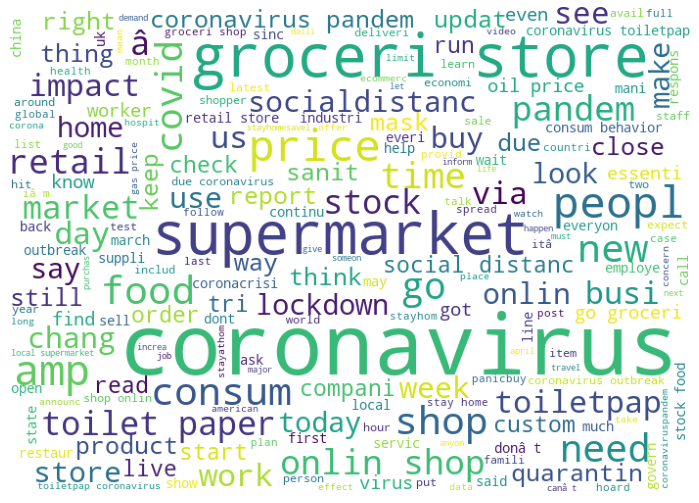

In [6]:
neutral_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
neutral_word_cloud.generate(' '.join(text for text in tweets.loc[tweets['label'] == 2, 'tweet_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(neutral_word_cloud)
plt.show()

pozytywne

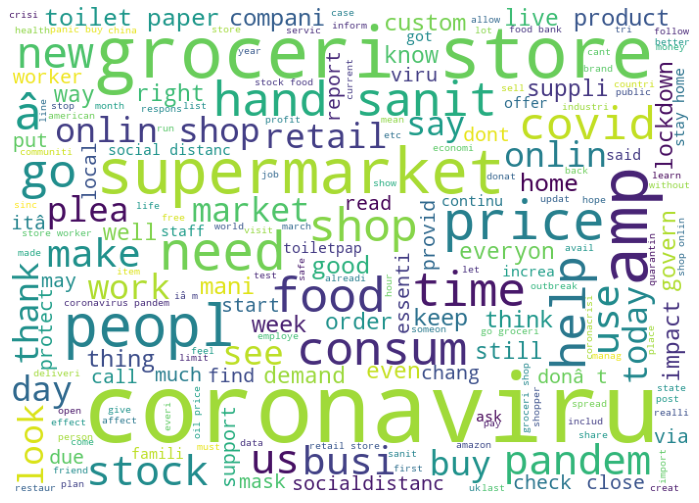

In [7]:
positive_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
positive_word_cloud.generate(' '.join(text for text in tweets.loc[tweets['label'] == 3, 'tweet_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(positive_word_cloud)
plt.show()

ekstremalnie pozytywne

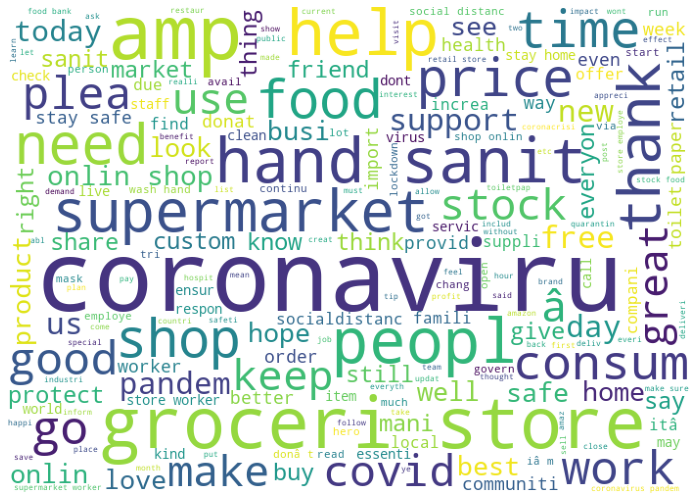

In [8]:
extremely_positive_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
extremely_positive_word_cloud.generate(' '.join(text for text in tweets.loc[tweets['label'] == 4, 'tweet_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(extremely_positive_word_cloud)
plt.show()

Wektoryzacja

In [9]:
x = tweets['tweet_clean']
y = tweets['label']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=1337)

count_vectorizer = CountVectorizer(
	stop_words='english',
	ngram_range=(1, 2),
	max_features=100
)

x_train_count_matrix = count_vectorizer.fit_transform(x_train)
x_test_count_matrix = count_vectorizer.transform(x_test)

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

x_train_tfidf = tfidf_transformer.fit_transform(x_train_count_matrix)
x_test_tfidf = tfidf_transformer.transform(x_test_count_matrix)

Modelowanie

In [12]:
# multinomial bayes

from sklearn.naive_bayes import MultinomialNB
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train_tfidf, y_train)
y_pred_class = multinomial_nb.predict(x_test_tfidf)
y_pred_prob = multinomial_nb.predict_proba(x_test_count_matrix)[:, 1]

In [13]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.recall_score(y_test, y_pred_class, average=None))
print(metrics.recall_score(y_test, y_pred_class, average='macro'))
print(metrics.precision_score(y_test, y_pred_class, average=None))
print(metrics.precision_score(y_test, y_pred_class, average='macro'))
print(metrics.f1_score(y_test, y_pred_class, average=None))
print(metrics.f1_score(y_test, y_pred_class, average='macro'))

0.3675308779347947
[[ 179  507   97  428    4]
 [  87  848  298  937   22]
 [   4  400  512  742    4]
 [  24  507  295 1542  106]
 [   6  157   98  961  222]]
0.3675308779347947
[0.1473251  0.38686131 0.30806258 0.62328213 0.15373961]
0.3238541476687723
[0.59666667 0.35055808 0.39384615 0.33449024 0.62011173]
0.4591345745640229
[0.23630363 0.36781609 0.34571236 0.43534726 0.2463929 ]
0.3263144474096998


In [14]:
# svm
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train_tfidf, y_train)
y_pred_class = svm.predict(x_test_tfidf)
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.recall_score(y_test, y_pred_class, average=None))
print(metrics.recall_score(y_test, y_pred_class, average='macro'))
print(metrics.precision_score(y_test, y_pred_class, average=None))
print(metrics.precision_score(y_test, y_pred_class, average='macro'))
print(metrics.f1_score(y_test, y_pred_class, average=None))
print(metrics.f1_score(y_test, y_pred_class, average='macro'))

0.40558584622232113
[[ 333  423  176  261   22]
 [ 182  892  464  593   61]
 [  21  399  843  378   21]
 [  62  518  502 1145  247]
 [  23  201  156  632  432]]
0.40558584622232113
[0.27407407 0.40693431 0.50722022 0.46281326 0.29916898]
0.390042166040228
[0.53623188 0.36662557 0.39374124 0.38052509 0.55172414]
0.4457695841874988
[0.3627451  0.38572973 0.44333421 0.41765457 0.38796587]
0.39948589592846495


In [15]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_tfidf, y_train)
y_pred_class = knn.predict(x_test_tfidf)
print(metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.recall_score(y_test, y_pred_class, average=None))
print(metrics.recall_score(y_test, y_pred_class, average='macro'))
print(metrics.precision_score(y_test, y_pred_class, average=None))
print(metrics.precision_score(y_test, y_pred_class, average='macro'))
print(metrics.f1_score(y_test, y_pred_class, average=None))
print(metrics.f1_score(y_test, y_pred_class, average='macro'))

[[410 408 185 167  45]
 [430 812 457 401  92]
 [168 557 644 261  32]
 [224 679 555 806 210]
 [115 317 251 489 272]]
0.32758428841660175
[0.33744856 0.37043796 0.38748496 0.3257882  0.18836565]
0.32190506439563504
[0.3043801  0.29282366 0.30783939 0.37947269 0.41781874]
0.34046691644017835
[0.32006245 0.32708963 0.34310069 0.35058721 0.25966587]
0.3201011708298499


Tokenizacja lstm

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets['tweet_clean'])
total_words = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(tweets['tweet_clean'])
max_sequence_len = min(max(len(seq) for seq in sequences), 100)
padded_sequences = pad_sequences(
	sequences,
	max_sequence_len,
	padding='pre'
)
x_lstm = padded_sequences
y_lstm = tweets['label']
x_lstm_train, x_lstm_test, y_lstm_train, y_lstm_test = train_test_split(x_lstm, y_lstm, train_size=0.8, stratify=y_lstm, random_state=1337)

In [17]:
from keras import Sequential
from keras import layers
# lstm
model = Sequential()
model.add(layers.Embedding(input_dim=total_words, output_dim=64, input_length=max_sequence_len))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(100))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.fit(
    x_lstm_train,
    y_lstm_train,
    epochs = 5,
    batch_size = 16,
	validation_data = (x_lstm_test, y_lstm_test),
)

Epoch 1/5
2247/2247 [==============================] - 81s 35ms/step - loss: 1.1829 - accuracy: 0.5037 - val_loss: 0.8226 - val_accuracy: 0.6928
Epoch 2/5
2247/2247 [==============================] - 101s 45ms/step - loss: 0.7460 - accuracy: 0.7305 - val_loss: 0.8129 - val_accuracy: 0.6977
Epoch 3/5
2247/2247 [==============================] - 89s 40ms/step - loss: 0.4935 - accuracy: 0.8297 - val_loss: 0.9118 - val_accuracy: 0.6831
Epoch 4/5
2247/2247 [==============================] - 101s 45ms/step - loss: 0.3282 - accuracy: 0.8915 - val_loss: 1.1253 - val_accuracy: 0.6635
Epoch 5/5
2247/2247 [==============================] - 98s 43ms/step - loss: 0.2285 - accuracy: 0.9258 - val_loss: 1.3574 - val_accuracy: 0.6577


In [19]:
model.save('covid_tweets_model.h5')
import numpy as np

y_pred_class = np.argmax(model.predict(x_lstm_test), axis=1)
print(metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.recall_score(y_test, y_pred_class, average=None))
print(metrics.recall_score(y_test, y_pred_class, average='macro'))
print(metrics.precision_score(y_test, y_pred_class, average=None))
print(metrics.precision_score(y_test, y_pred_class, average='macro'))
print(metrics.f1_score(y_test, y_pred_class, average=None))
print(metrics.f1_score(y_test, y_pred_class, average='macro'))

[[ 803  353   13   40    6]
 [ 306 1408  154  290   34]
 [  23  297 1113  217   12]
 [  40  386  158 1617  273]
 [   4   43   10  417  970]]
0.6577278290864582
[0.66090535 0.64233577 0.66967509 0.65359741 0.67174515]
0.6596517543842151
[0.68282313 0.56614395 0.76864641 0.62650136 0.74903475]
0.6786299183444277
[0.67168549 0.601838   0.71575563 0.63976261 0.7082877 ]
0.6674658842683006
